# Some very basic things in R

## ways to open R

* command line in the terminal: 

```
R --vanilla
```

Downside: no plots pop up in Binder.

* R Console tab

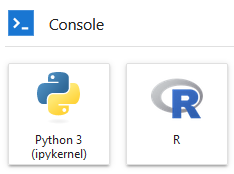

Downside: messages are not shown.

* Run RStudio

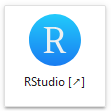

Downside: opens in new Browser tab.

## getting help

`?`


## work with numbers, variables vectors
Numbers:

`5+5`

`5^5`

Variables:

`a<-600`

`b=7`

Here you see: objects can be defined with `=` or `<-`

Vectors with `:`:

`1:10`

`b:a`

Built-in mathematical functions:

`a+b`

`a^b`

`sqrt(5)`

`sqrt(a)`

`mean(b:a)`

`?mean`


## Types of objects

Vector:

`new_vec<-c(1,4,5,"A",1/5, "Random text")`

Array:

`new_mat<-matrix(new_vec,nrow=2)`

List:

`new_list<-list(new_vec,new_mat)`

## Processing data - data.frames

Read and write a table. Apples and oranges again:

```
setwd("~/notebooks/basics/data/")

testfile<-read.table('fileA.txt',as.is=T,sep="\t",header=T)

write.table(testfile, 'fileG.txt ',sep="\t",row.names=F,col.names=F,quote=F)

```

## Looking at a table in R:

Just show me the whole file:
```
testfile
```

Or show me a part of it

```
head(testfile)
tail(testfile)
nrow(testfile)
```

This is the way to select columns or rows:

```
testfile[,2]
testfile[2,]
```

Get summaries of stuff:
```
summary(testfile)
summary(testfile[,1])
table(testfile[,2])
table(testfile$fruit)
```

Get info about a column in R. Column 3 has numeric values, so we can calculate stuff:

```
mean(testfile[,3])
testfile[,3]>50
table(testfile[,3]>50)
```


## Some plotting

A simple plot (scatterplot) of the numeric values:

```
plot(testfile[,3],type="p")
plot(testfile[,3],type="l")
plot(sort(testfile[,3]),type="b")
```

Or a histogram?

```
hist(testfile[,3])
hist(testfile[,3],breaks=10)
```

Now, how many apples and oranges are there? First, a table with numeric values:

```
newdf<-as.matrix(table(testfile$fruit))
newdf
```

Then, a barplot

```
barplot(newdf,beside=T,names.arg=rownames(newdf),las=2)
```

Ok, the data is messy, there is a lot of other stuff, but only three categories we actually want to compare. So, let's select something:

```
newdf2<-rbind(newdf[which(rownames(newdf)%in%c("apple","orange","pear")),,drop=F],sum(newdf[-which(rownames(newdf)%in%c("apple","orange","pear")),1]))
rownames(newdf2)[4]<-"other"
barplot(newdf2,beside=T,names.arg=rownames(newdf2),las=2)
```

And maybe ordered. And with nice colors?

```
barplot(newdf2[order(newdf2)],beside=T,names.arg=rownames(newdf2)[order(newdf2)],las=2,col=c("red","orange","green","grey")[order(newdf2)])
```


## Save plots

**as flat image**

```
png("myplot.png",600,600)
barplot(newdf2,beside=T,names.arg=rownames(newdf2),las=2)
dev.off()
```

**as pdf file**

```
pdf("myplot.pdf",8,8)
barplot(newdf2,beside=T,names.arg=rownames(newdf2),las=2)
dev.off()
```
